<a href="https://colab.research.google.com/github/1bin01/Machine-Learning/blob/main/Introduction-to-Machine-Learning/Ch4_representing_data_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn
!pip install --upgrade joblib==1.1.0
!pip install -q --upgrade scikit-learn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

from importlib import reload  # plt 다시 그릴 때
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 경고 제거 (없어도 문제는 x)

# 나눔 포트 설정 (런타임 다시 시작 해줘야됨!)
import matplotlib as mpl
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')
mpl.rc('axes', unicode_minus=False)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 di

## 4.1 범주형 변수

In [2]:
# 특성 공학 - 가장 적합한 데이터 표현을 찾는 것

## 4.1.1 원-핫-인코딩(가변수)

In [3]:
# 가변수 - 범주형 변수를 0 또는 1 값을 가진 하나 이상의 새로운 특성으로 바꿈

import os
data = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "adult.data"), header = None, index_col = False,
    names = ['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [4]:
# value_counts 범주형 데이터 확인하기 (열마다 해줘야함)
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [5]:
# get_dummies로 범주형 데이터 변환해주기
print("원본특성 :\n", list(data.columns), "\n")

data_dummies = pd.get_dummies(data)
print("변환한 데이터 :\n", list(data_dummies.columns))

원본특성 :
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

변환한 데이터 :
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-ser

In [6]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [7]:
# 데이터로 부터 target을 분리(**중요**)
features = data_dummies.loc[:, 'age' : 'occupation_ Transport-moving']
X = features.values
y = data_dummies['income_ >50K'].values

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
logreg = LogisticRegression(max_iter = 5000)
logreg.fit(X_train, y_train)
print("test score : {:.2f}" .format(logreg.score(X_test, y_test)))

test score : 0.82


## 4.1.2 숫자로 표현된 범주형 특성

In [9]:
demo_df = pd.DataFrame({'숫자 특성' : [0, 1, 2, 1],
                       '범주형 특성' : ['나', '너', '나', '그']})
demo_df

,숫자 특성,범주형 특성
0,0,나
1,1,너
2,2,나
3,1,그


In [10]:
# get_dummies는 문자열만 범주형 변수로 간주함
pd.get_dummies(demo_df)

,숫자 특성,범주형 특성_그,범주형 특성_나,범주형 특성_너
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [11]:
# 숫자형 변수를 가변수로 만들기 위해서는
# 1. 인코딩할 열을 명시

pd.get_dummies(demo_df, columns = ['숫자 특성', '범주형 특성'])

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_그,범주형 특성_나,범주형 특성_너
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


In [12]:
# 2. 숫자를 문자열로 변환

demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
pd.get_dummies(demo_df)

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_그,범주형 특성_나,범주형 특성_너
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


## 4.2 OneHotEncoder와 ColumnTransformer: scikit-learn으로 범주형 변수 다루기

In [13]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder는 모든 열에 인코딩을 수행
ohe = OneHotEncoder(sparse = False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [14]:
# 원본 범주형 변수 이름 확인
print(ohe.get_feature_names_out())

['숫자 특성_0' '숫자 특성_1' '숫자 특성_2' '범주형 특성_그' '범주형 특성_나' '범주형 특성_너']


In [15]:
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [16]:
# ColumnTransformer - 열마다 다른 변환을 적용

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
    [
        ("scaling", StandardScaler(), ['age', 'hours-per-week']),
        ("onehot", OneHotEncoder(sparse = False), ['workclass', 'education', 'gender', 'occupation'])
    ]
)

In [17]:
# 선형회귀 모델에 적용
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data_features = data.drop("income", axis = 1)
X_train, X_test, y_train, y_test = train_test_split(data_features, data.income, random_state = 0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
X_test_trans = ct.transform(X_test)
print(X_train_trans.shape)

(24420, 44)


In [18]:
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train_trans, y_train)

print("test score : {:.2f}" .format(logreg.score(X_test_trans, y_test)))

test score : 0.81


In [19]:
# named_transformers_ ColumnTranformer 안의 단계에 접근

ct.named_transformers_.onehot

OneHotEncoder(sparse=False)

## 4.3 make_column_transformer로 간편하게 ColumnTransformer 만들기

In [20]:
# 자동으로 이름 지정
from sklearn.compose import make_column_transformer

ct = make_column_transformer(
    [
        (StandardScaler(), ['age', 'hours-per-week']),
        (OneHotEncoder(sparse = False), ['workclass', 'education', 'gender', 'occupation'])
    ]
)

## 4.4 구간 분할, 이산화 그리고 선형 모델, 트리 모델

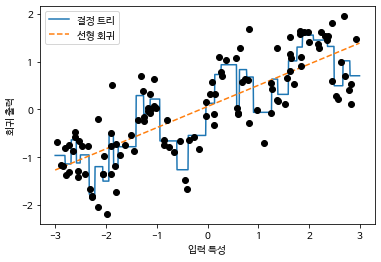

In [21]:
# 어떤 모델을 사용하는 지에 따라서도 데이터의 표현 방법이 달라짐

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples = 120)
line = np.linspace(-3, 3, 1000, endpoint = False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_leaf = 3).fit(X, y)
plt.plot(line, reg.predict(line), label = "결정 트리")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label = "선형 회귀")

plt.plot(X[:, 0], y, 'o', c = 'k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

In [22]:
# 각 모델에 구간 분할(bining) 적용해보기

from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(n_bins = 10, strategy = 'uniform').fit(X)
print("bin edges : \n", kb.bin_edges_)

bin edges : 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
        -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
         2.92132162])                                                   ]


In [23]:
X_binned = kb.transform(X)
print(X[:10])
X_binned.toarray()[:10]

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

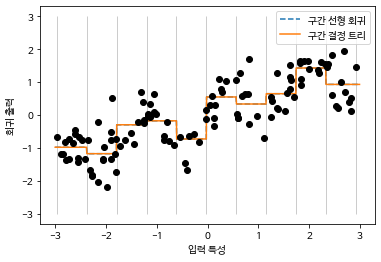

In [24]:
kb = KBinsDiscretizer(n_bins = 10, strategy = 'uniform', encode = 'onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), '--', label = "구간 선형 회귀")

reg = DecisionTreeRegressor(min_samples_split = 3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label = "구간 결정 트리")

plt.plot(X[:, 0], y, 'o', c = 'k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth = 1, alpha = .2)
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

## 4.5 상호작용과 다항식

In [25]:
# 나눠진 구간에 기울기 학습하도록 하기
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(120, 11)


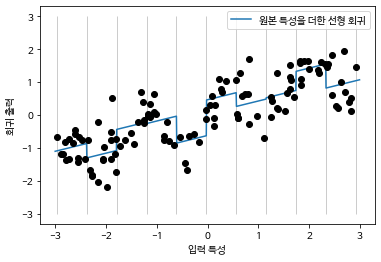

In [26]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label = '원본 특성을 더한 선형 회귀')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth = 1, alpha = .2)
plt.legend(loc = "best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.plot(X[:, 0], y, 'o', c = 'k')

In [27]:
# 구간과 x축 사이에 상호작용을 추가 -> 구간마다 기울기를 다르게
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(120, 20)


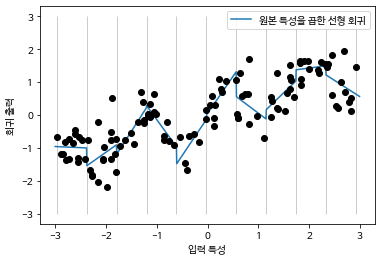

In [28]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label = '원본 특성을 곱한 선형 회귀')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth = 1, alpha = .2)
plt.legend(loc = "best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.plot(X[:, 0], y, 'o', c = 'k')

In [29]:
# 원본 특성의 다항식 추가하기

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 10, include_bias = False)
poly.fit(X)
X_poly = poly.transform(X)
print("X_poly shape : ", X_poly.shape)
print("\nX 원소 :\n", X[:5])
print("\nX_poly 원소 :\n", X_poly[:5])

X_poly shape :  (120, 10)

X 원소 :
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

X_poly 원소 :
 [[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [30]:
# 각 특성의 차수를 아는법
print(poly.get_feature_names_out())

['x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']


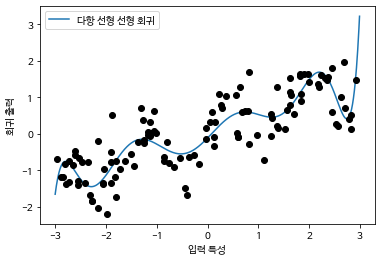

In [31]:
# 다항 회귀 모델 - 다항식 특성을 선형 모델에 적용

reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)

plt.plot(line, reg.predict(line_poly), label = '다항 선형 선형 회귀')

plt.legend(loc = "best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.plot(X[:, 0], y, 'o', c = 'k')

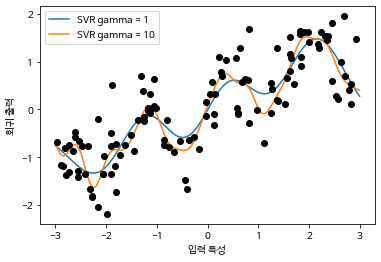

In [32]:
# SVM모델과 비교해보기 (너무 민감함)
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma = gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label = 'SVR gamma = {}' .format(gamma))

plt.legend(loc = "best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.plot(X[:, 0], y, 'o', c = 'k')

In [33]:
# 보스턴 주택 가격 데이터셋 족용해보기
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train ,y_test = train_test_split(boston.data, boston.target, random_state = 0)

scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2차 다항식 특성으로 뽑기
poly = PolynomialFeatures(degree = 2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape : ", X_train.shape)
print("X_train_poly.shape : ", X_train_poly.shape)

X_train.shape :  (379, 13)
X_train_poly.shape :  (379, 105)


In [34]:
print(poly.get_feature_names())

['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [35]:
# Ridge를 이용해 상호작용(다항식)의 영향 확인하기

# 선형 모델에서는 성능이 좋아짐
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)
print("상호작용x 점수 : {:.3f}" .format(ridge.score(X_test_scaled, y_test)))

ridge = Ridge().fit(X_train_poly, y_train)
print("상호작용o 점수 : {:.3f}" .format(ridge.score(X_test_poly, y_test)))

상호작용x 점수 : 0.621
상호작용o 점수 : 0.753


In [36]:
# 랜덤 포레스트는 성능이 오히려 나빠짐
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(X_train_scaled, y_train)
print("상호작용x 점수 : {:.3f}" .format(rf.score(X_test_scaled, y_test)))

rf = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(X_train_poly, y_train)
print("상호작용x 점수 : {:.3f}" .format(rf.score(X_test_poly, y_test)))

상호작용x 점수 : 0.795
상호작용x 점수 : 0.775


## 4.6 일변량 비선형 변환

In [42]:
 # log, exp -> 데이터의 스케일을 변경해 비선형성을 없앰 -> 선형 모델의 성능 증가 (정규분포와 비슷할 때 최고의 성능)

 rnd = np.random.RandomState(0)
 X_org = rnd.normal(size = (1000, 3))
 w = rnd.normal(size = 3)

 X = rnd.poisson(10 * np.exp(X_org))
 y = np.dot(X_org, w)
 print(X[:10, 0])

[ 56  81  25  20  27  18  12  21 109   7]


In [41]:
# 특성값이 나타난 횟수로 패턴 찾기

print("특성 출현 횟수 :\n", np.bincount(X[:, 0]))

특성 출현 횟수 :
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, '특성값')

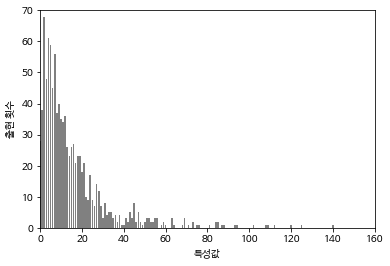

In [45]:
# 선형 회귀가 잘 처리하지 못하는 데이터 분포
plt.xlim(0, 160)
plt.ylim(0, 70)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color = 'gray')
plt.ylabel("출현 횟수")
plt.xlabel("특성값")

In [47]:
# 리지 회귀 적용해보기
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
rdg = Ridge().fit(X_train, y_train)
print("test score  : {:.3f}" .format(rdg.score(X_test, y_test)))

test score  : 0.622


Text(0, 0.5, '출현 횟수')

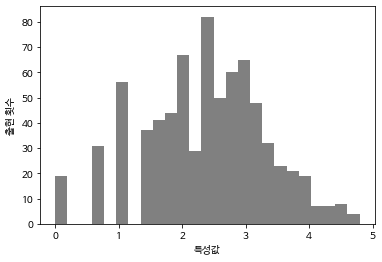

In [51]:
# 데이터를 log 스케일로 변환하기
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

plt.hist(X_train_log[:, 0], bins = 25, color = 'gray')
plt.xlabel("특성값")
plt.ylabel("출현 횟수")

In [52]:
# 선형 모델은 스케일 변환이 필수적 <-> 트리 모델은 스스로 상호작용을 찾아낼 수 있음

rdg = Ridge().fit(X_train_log, y_train)
print("test score : {:.3f}" .format(rdg.score(X_test_log, y_test)))

test score : 0.875


## 4.7 특성 자동 선택

In [54]:
# 특성이 추가 -> 모델이 더 복잡해지고, 과대적합 가능성이 높아짐
# 유용한 특성만 선택!!

## 4.7.1 일변량 통계

In [58]:
# 특성과 타깃 사이에 중요한 관계가 있는지 계산
# 각 특성이 독립적으로 평가
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
cancer = load_breast_cancer()

# 노이즈 특성 추가하기
rng = np.random.RandomState(42)
noise = rng.normal(size = (len(cancer.data), 50))
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state = 0, test_size = .5)
select = SelectPercentile(score_func = f_classif, percentile = 50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print("X_train shape : ", X_train.shape)
print("X_train_selected shape : ", X_train_selected.shape)

X_train shape :  (284, 80)
X_train_selected shape :  (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0, 0.5, '[0]')

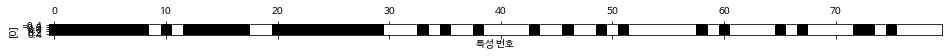

In [59]:
# get_support : 선택된 특성을 보여줌

mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap = 'gray_r')
plt.xlabel("특성 번호") 
plt.ylabel([0])

In [63]:
X_test_selected = select.transform(X_test)

lr = LogisticRegression(max_iter = 5000)
lr.fit(X_train, y_train)
print("전체 특성을 이용 했을 때 score : {:.3f}" .format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("선택된 특성만을 이용 했을 때 score : {:.3f}" .format(lr.score(X_test_selected, y_test)))

전체 특성을 이용 했을 때 score : 0.951
선택된 특성만을 이용 했을 때 score : 0.933
